# <p style = 'text-align:center'> Trabalho de Conclusão da Disciplina de Aprendizado de Máquina:
# <p style = 'text-align: center'> Predição de Índice de Refração em Minerais
Por Guilherme C. de Almeida Sobreira e Henrique Valente Nogueira

# <p style='text-align: center;'> Introdução

Materiais ópticos vêm sido utilizados há séculos para os mais diversos propósitos, como para ampliar ou expandir o campo de visão, por propósitos estéticos, para a construção de lasers e outros. Grande parte desses usos depende de propriedades físicas dos materiais, como por exemplo o índice de refração. O índice de refração mede a velocidade da luz no objeto em relação ao seu meio, e, pela lei de Snell-Descartes, é capaz de distorcer a angulação da luz. Por causa disso, é de interesse comercial e científico o desenvolvimento de algoritmos capazes de predizer o índice de refração de materiais, de maneira que se possa procurar características específicas. Neste trabalho, utilizamos diferentes modelos e técnicas de aprendizado de máquina para encontrar o índice de refração de minerais. O conjunto foi obtido de um dataset didático sobre mineralogia e suas colunas indicam características físicas e químicas de diferentes minerais.

# <p style = 'text-align:center;'> Metodologia

Um dataset didático de mineralogia foi obtido. As instruções de acesso a esse dado, bem como a explicação de todas as informações a respeito desses dados estão disponíveis no Github. Esses dados foram tratados para excluir minerais que o índice de refração é desconhecido. Para reduzir a dimensionalidade dos dados, foi utilizada a seleção por fator de inflação de variância (VIF). Os dados foram divididos em "ztreino" e "teste", com uma semente aleatória definida. Uma função definida foi utilizada para analisar as métricas de erro e um gráfico visual plotado para cada diferente modelo. 

## <p style = 'text-align:center;'> Download do dataframe

O dataframe foi obtido por um conjunto de dados de mineralogia e salvo como "Minerals_Database.csv". Ele foi extraído pela biblioteca `Pandas` e os minerais que tem índice de refração menor que zero foram excluídos (pois, nesse caso, eram minerais cujo índice de refração é desconhecido). Os parâmetros do dataframe podem ser consultados no Github.

In [1]:
import pandas as pd
dataframe = pd.read_csv('Minerals_Database.csv')
dataframe

,Unnamed: 0,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
0,0,Abenakiite-(Ce),5.0,4.50,0.0,3.240,3.0,1.580,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,817.339002,0.123390,5.498
1,1,Abernathyite,4.0,2.75,3.0,3.446,3.0,1.592,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,435.069330,0.056083,6.439
2,2,Abhurite,5.0,2.00,3.0,4.420,3.0,2.085,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,921.092220,0.122631,6.234
3,3,Abswurmbachite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,550.019900,0.033658,13.563
4,4,Actinolite,2.0,5.50,2.0,1.050,4.0,1.634,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,861.185368,0.112074,6.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3107,3107,Zoltaiite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,677.090039,0.067308,8.349
3108,3108,Zugshunstite-(Ce),0.0,0.00,0.0,0.000,0.0,0.000,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,33.0,1005.674169,0.280205,2.979
3109,3109,Zvyaginite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,38.0,1037.626464,0.179472,4.799
3110,3110,Zwieselite,0.0,0.00,0.0,0.000,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,225.663765,0.056017,3.344


In [139]:
desvio_padrao = dataframe['Refractive Index'].std()
print(f'O desvio padrão do Índice de Refração é {desvio_padrao:.2f}')


O desvio padrão do Índice de Refração é 0.24


## <p style = 'text-align:center;'> Tratamento dos dados

Os dados precisam ser convertidos em `float` para poderem ser manipulados computacionalmente. Isso pode ser feito pelo `astype`, que converte os dados das colunas em um tipo específico. A seleção de atributos é feita pela biblioteca `sci-kit learn`. O procedimento do VIF pode, caso necessário, ser consultado em fontes educacionais de aprendizado de máquina. Foram excluídos cerca de 2500 minerais, que não tinham o índice de refração conhecido.

### Conversão dos dados para o tipo 'float'

A primeira coluna não foi convertida, pois corresponde ao index e ao nome dos minerais. por isso, a conversão só ocorreu para n>1. 

In [2]:
n = 2
while n < 140:
    dataframe.iloc[:, n] = dataframe.iloc[:, n].astype(float)  # Converte os valores da coluna para float
    n += 1
dataframe = dataframe.loc[dataframe['Refractive Index'] >0] #eliminação de minerais sem informações
dataframe.pop('Unnamed: 0')
df = dataframe.copy()
df.pop('Name')
df

,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,Helium,Lithium,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
0,5.0,4.50,0.0,3.240,3.0,1.580,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,817.339002,0.123390,5.498
1,4.0,2.75,3.0,3.446,3.0,1.592,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,435.069330,0.056083,6.439
2,5.0,2.00,3.0,4.420,3.0,2.085,0.000,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,921.092220,0.122631,6.234
4,2.0,5.50,2.0,1.050,4.0,1.634,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28.0,861.185368,0.112074,6.378
5,2.0,3.50,3.0,3.295,4.0,1.457,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,8.0,225.618151,0.044887,4.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,4.0,7.50,1.0,4.650,3.0,1.928,0.039,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,526.041800,0.078468,5.564
805,3.0,6.50,2.0,3.230,4.0,1.702,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17.0,379.378178,0.100890,3.121
806,3.0,3.50,3.0,2.180,1.0,1.590,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,19.0,492.887716,0.078566,5.207
807,0.0,7.00,2.0,3.411,2.0,1.596,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,263.580584,0.089458,2.446


### Definição de Features e Target

Os features (atributos) são parâmetros do dataframe que serão utilizados como base dos algoritmos de previsão. Os target são atributos que serão preditos.

In [4]:
ATRIBUTOS = list(df.columns.values)
ATRIBUTOS.remove('Refractive Index')
TARGET = ["Refractive Index"]
X = df.reindex(ATRIBUTOS, axis = 1)
y = df.reindex(TARGET,axis=1).values.ravel()


### Seleção de atributos

A seleção por VIF não está disponível no sci-kit. Por isso, podemos criar uma função que a realiza. Para isso, importamos um modelo de regressão linear. A seleção por VIF recolhe os valores de um dataframe. O VIF é calculado por:
$$
VIF = \frac{1}{(1 - R^{2})}
$$
Existe um limiar optativo para o VIF. Um padrão exigente é o 5. Se a coluna tiver um VIF maior que o limiar, ela é eliminada.

In [5]:
from sklearn.linear_model import LinearRegression
import pandas as pd

def selecao_vif(df_atributos, limiar_vif = 5):
    #cópia do dataframe argumento
    df = df_atributos.copy()
    # Loop para remover atributos com VIF acima do limiar
    while True:
        VIFs = []
        # Calcular o VIF para cada coluna
        for col in df.columns:
            X = df.drop(col, axis=1).values  
            y = df[col].values       
            # Treina o modelo e obtém o R²
            r_quadrado = LinearRegression().fit(X, y).score(X, y)
            if r_quadrado < 1:
                VIF = 1 / (1 - r_quadrado)
            else:
                VIF = float("inf")  # Define VIF infinito se R² = 1
            VIFs.append(VIF)
        VIF_maximo = max(VIFs)
        # Se o maior VIF estiver acima do limiar, remove o atributo correspondente
        if VIF_maximo > limiar_vif:
            indice = VIFs.index(VIF_maximo)
            coluna_remocao = df.columns[indice]
            df = df.drop(coluna_remocao, axis=1)
        else:
            break  
    return df

df_vif = selecao_vif(df,5)
df_vif

,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Boron,Carbon,Nitrogen,...,Tungsten,Lead,Bismuth,Thorium,Uranium,Hydroxyl,Ammonium,Hydrated Water,Molar Volume,Calculated Density
0,5.0,4.50,0.0,3.240,3.0,1.580,0.000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123390,5.498
1,4.0,2.75,3.0,3.446,3.0,1.592,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.056083,6.439
2,5.0,2.00,3.0,4.420,3.0,2.085,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.122631,6.234
4,2.0,5.50,2.0,1.050,4.0,1.634,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112074,6.378
5,2.0,3.50,3.0,3.295,4.0,1.457,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.044887,4.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,4.0,7.50,1.0,4.650,3.0,1.928,0.039,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078468,5.564
805,3.0,6.50,2.0,3.230,4.0,1.702,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.100890,3.121
806,3.0,3.50,3.0,2.180,1.0,1.590,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.078566,5.207
807,0.0,7.00,2.0,3.411,2.0,1.596,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089458,2.446


### Discussão

A seleção por VIF eliminou 75 atributos de nosso dataset. Não é a intenção deste trabalho analisar as razões para isso, apesar de estar no escopo da ciência de dados. Isso facilitará os modelos, pois casos com alta dimensionalidade podem ser prejudicados por overfitting ou falta de predições razoáveis.

### Split de dados

É necessário fazer uma divisão de dados para que possamos analisar eficientemente as métricas. Esses dados serão divididos em treino e teste, pela função `train_test_split` da biblioteca `scikit`.  O tamanho foi definido para 70% de dados treino e o restante para validação. A semente aleatória, utilizada na divisão, foi 774. O código foi apropriado pelo material de aula da disciplina de Aprendizado de Máquina na Ilum - Escola de Ciência, ministrada pelo Prof. Daniel Cassar.

In [63]:
from sklearn.model_selection import train_test_split
TAMANHO_TESTE = 0.3
SEMENTE_ALEATORIA = 774

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)
#para a totalidade dimensional
df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]
#treinos
X_treino = df_treino.reindex(ATRIBUTOS, axis = 1)
y_treino = df_treino.reindex(TARGET, axis = 1).values.ravel()
#testes
X_teste = df_teste.reindex(ATRIBUTOS, axis = 1)
y_teste = df_teste.reindex(TARGET,axis=1).values.ravel()
#para VIF
ATRIBUTOSv = list(df_vif.columns.values)
ATRIBUTOSv.remove('Refractive Index')
TARGETv = ["Refractive Index"]
indicesv = df_vif.index
indices_treinov, indices_testev = train_test_split(
    indicesv, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)
df_treino_vif = df_vif.loc[indices_treinov]
df_teste_vif = df_vif.loc[indices_testev]
#treinos
X_vif_treino = df_treino_vif.reindex(ATRIBUTOSv, axis=1)
y_vif_treino = df_treino_vif.reindex(TARGETv, axis=1).values.ravel()
#testes
X_vif_teste = df_teste_vif.reindex(ATRIBUTOSv, axis = 1)
y_vif_teste = df_teste_vif.reindex(TARGETv, axis =1).values.ravel()

### Modelo de gráfico com parâmetros de erro

Para padronizar a análise das métricas, definiremos uma função. Essa função receberá o modelo a ser analisado. Ela plotará um gráfico com as métricas de erro, do dado previsto em função do dado real. As métricas serão MSE, RMSE, R². Uma função para comparar performance padrão com VIF foi criada.

In [94]:
def grafico_metricas_erro(xtreino,ytreino,xteste,yteste,modelo):
    modelo.fit(xtreino,ytreino)
    #métricas de erro
    from sklearn.metrics import mean_squared_error, r2_score
    y = modelo.predict(xteste)
    r = r2_score(yteste, y)
    r = f'{r:.2f}'
    mse = mean_squared_error(y,yteste)
    mse = f'{mse:.2f}'
    rmse = mean_squared_error(yteste,y, squared=False)
    rmse = f'{rmse:.2f}'
    import matplotlib.pyplot as plt
    from statistics import mean
    c = mean(y)
    #Plotagem dos gráficos
    plt.scatter(yteste,y,color = 'hotpink', alpha = 0.7)
    plt.scatter(c,c,color='white',alpha=0.1,label = f'$R^2$ = {r}')
    plt.scatter(c,c,color='white',alpha=0.1,label = f'$MSE$ = {mse}')
    plt.scatter(c,c,color='white',alpha=0.1,label = f'$RMSE$ = {rmse}')
    plt.title(f'índice de Refração previsto em função do Índice de Refração real para o modelo {str(modelo)}')
    plt.xlabel('Índice de Refração real')
    plt.ylabel('Índice de Refração previsto')
    plt.grid(axis = 'y')
    plt.legend()
    plt.show()
    return [r, mse,rmse]
#função-mãe para os testes
def teste(modelo):
    print('Para o VIF:')
    vif = grafico_metricas_erro(X_vif_treino,y_vif_treino,X_vif_teste, y_vif_teste,modelo)
    print('Para o Normal:')
    normal = grafico_metricas_erro(X_treino,y_treino,X_teste,y_teste,modelo)
    if vif[2]<normal[2]:
        print(f'As estatísticas de erro do modelo normal tiveram pior desempenho que o modelo por VIF:')
        print('')
        print('Estatísticas do VIF:')
        print(vif)
        print('----')
        print('Estatísticas do modelo normal:')
        print(normal)
    elif vif[2]>=normal[2]:
        print(f'As estatísticas de erro do modelo vif tiveram pior desempenho que o modelo normal:')
        print('')
        print('Estatísticas do normal:')
        print(normal)
        print('----')
        print('Estatísticas do modelo vif:')
        print(vif)

# <p style = 'text-align:center;'> Treinamento de Modelos

Diferentes modelos serão treinados para analisar a performance de cada um deles. O modelo mais simples possível é o modelo Baseline, que considera que todas as previsões serão a média do conjunto de teste. As métricas de erro são comparadas a esse modelo.

## <p style= 'text-align: center;'> Modelo Baseline

Como dito, o modelo baseline se baseia na média dos atributos. Ele pode ser feito pela biblioteca `scikit-learn`. Ele é a métrica da performance dos modelos: se um modelo não consegue ter melhor desempenho que o próprio baseline, então ele não deveria sequer ser considerado.

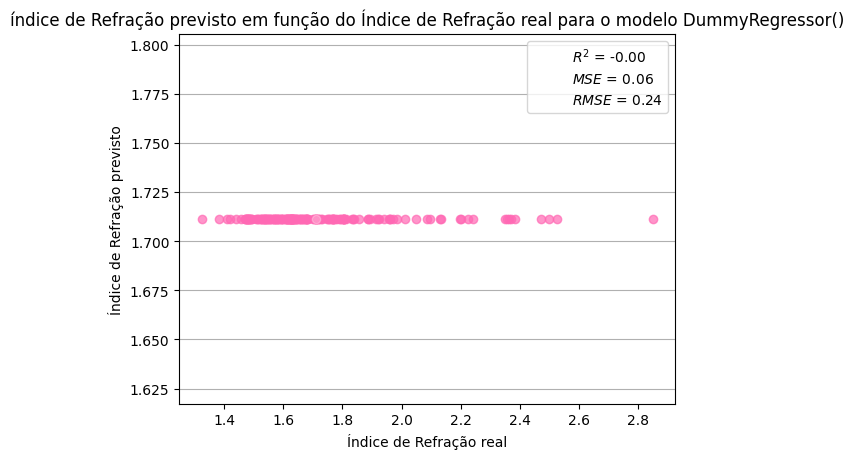

['-0.00', '0.06', '0.24']

In [85]:
import pandas as pd
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor(strategy="mean")

# grafico_metricas_erro(X_treino,y_treino,X_teste,y_teste, baseline)
grafico_metricas_erro(X_vif_treino,y_vif_treino,X_vif_teste,y_vif_teste, baseline)


Para o VIF:


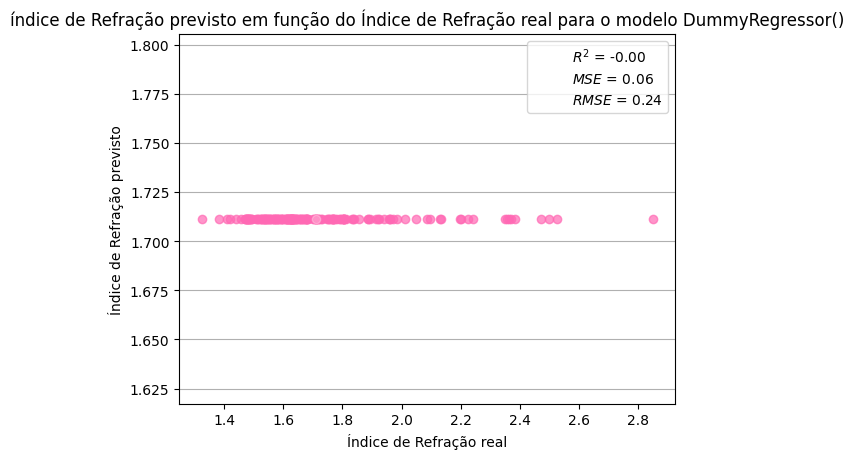

Para o Normal:


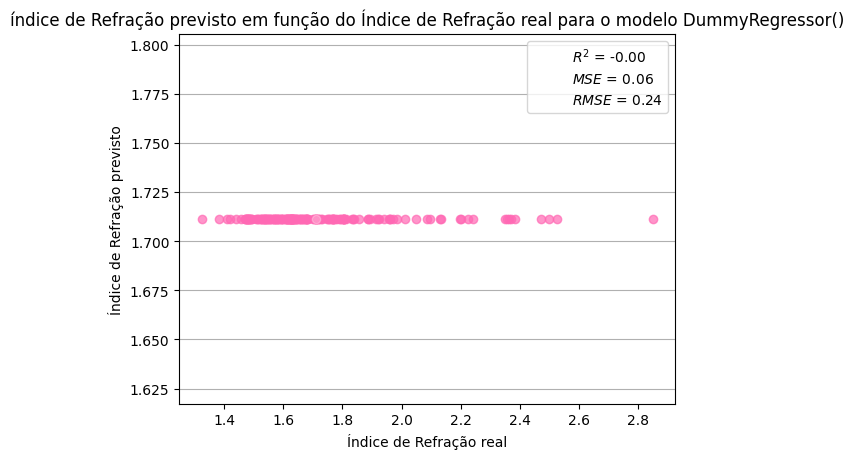

As estatísticas de erro do modelo vif tiveram pior desempenho que o modelo normal:

Estatísticas do normal:
['-0.00', '0.06', '0.24']
----
Estatísticas do modelo vif:
['-0.00', '0.06', '0.24']


In [95]:
teste(baseline)

## <p style = 'text-align:center;'> Modelo Linear

O modelo linear considera que o alvo de seu algoritmo é uma combinação linear de todos os seus features. Para isso, ele calcula os possíveis valores de coeficientes e te retorna uma função.

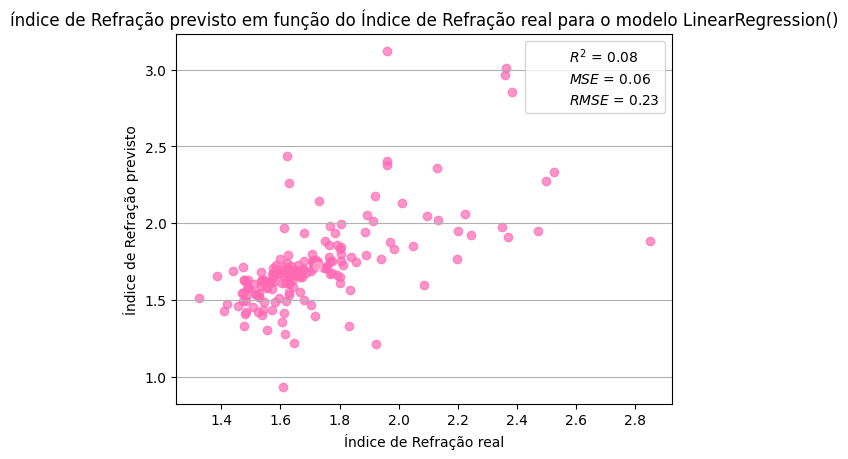

['0.08', '0.06', '0.23']

In [69]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
grafico_metricas_erro(X_vif_treino,y_vif_treino,X_vif_teste,y_vif_teste, linear)




Para o VIF:


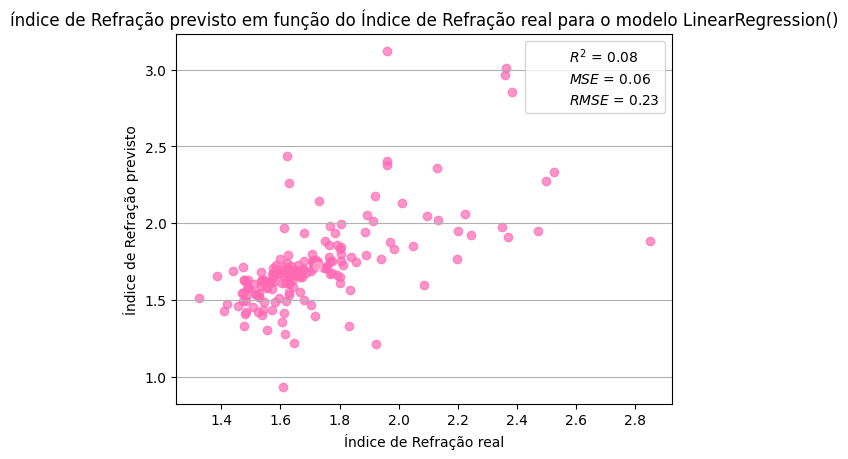

Para o Normal:


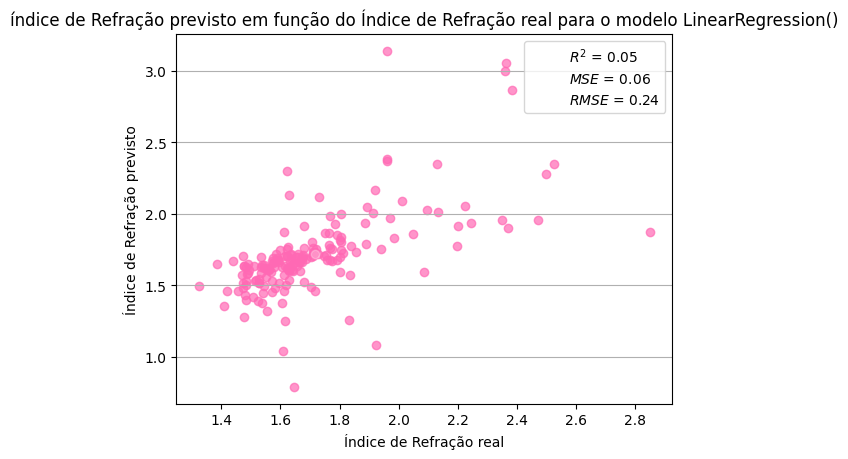

As estatísticas de erro do modelo normal tiveram pior desempenho que o modelo por VIF:

Estatísticas do VIF:
['0.08', '0.06', '0.23']
----
Estatísticas do modelo normal:
['0.05', '0.06', '0.24']


In [96]:
teste(linear)

## <p style = 'text-align:center;'> Modelo de Floresta Aleatória 

O modelo de floresta aleatória considera uma série de árvores de decisão para performar sua medida. Por isso, espera-se que sua performance seja melhor do que a de uma árvore de decisão individualmente. A semente escolhida foi a 49. 

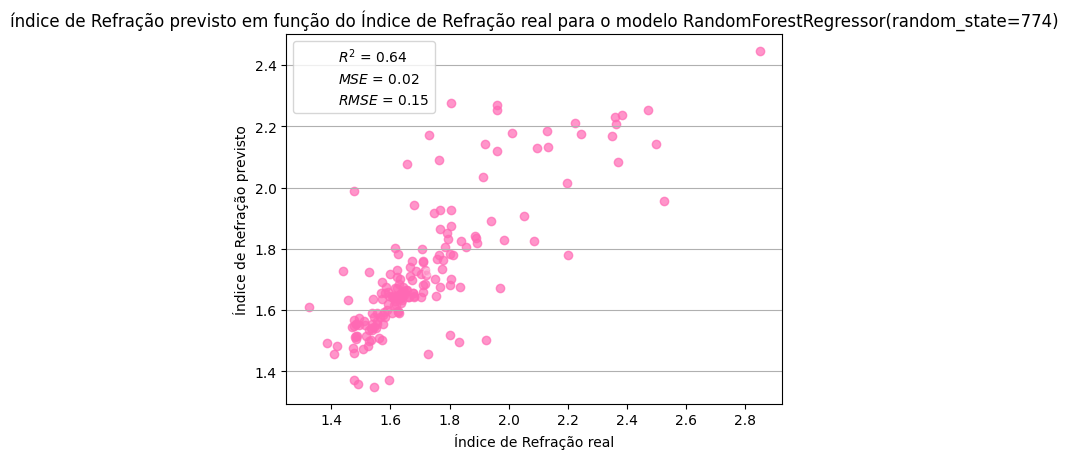

['0.64', '0.02', '0.15']

In [121]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=774)
grafico_metricas_erro(X_vif_treino,y_vif_treino,X_vif_teste,y_vif_teste, rf_model)


Para o VIF:


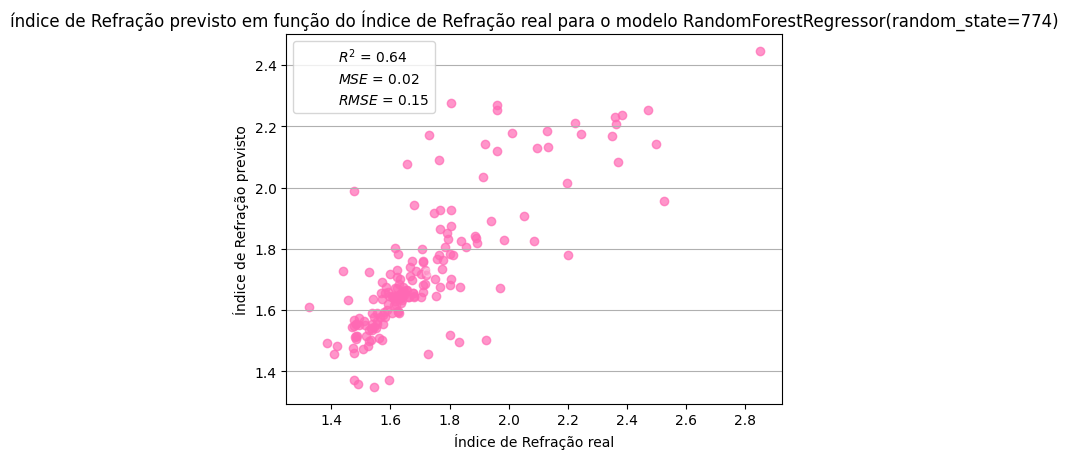

Para o Normal:


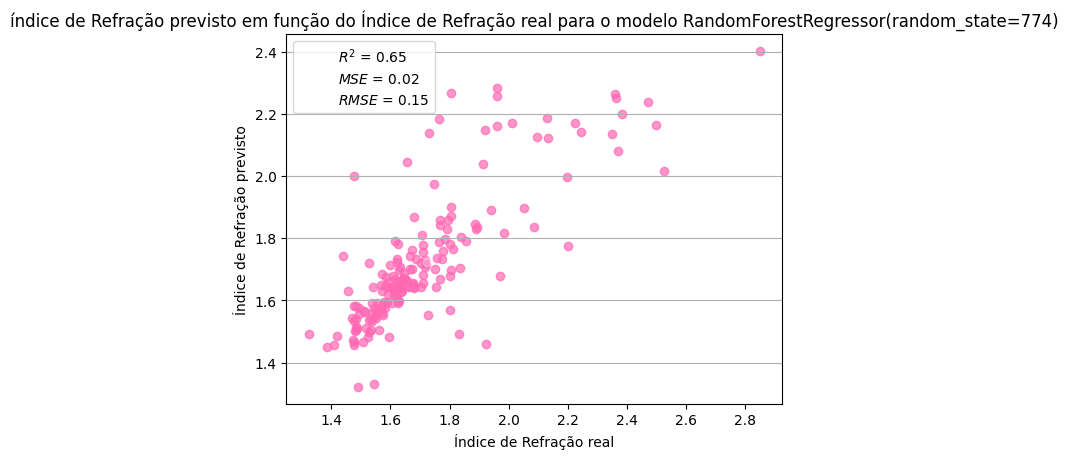

As estatísticas de erro do modelo vif tiveram pior desempenho que o modelo normal:

Estatísticas do normal:
['0.65', '0.02', '0.15']
----
Estatísticas do modelo vif:
['0.64', '0.02', '0.15']


In [122]:
teste(rf_model)

## <p style = 'text-align:center;'> Modelo Árvore de Decisão

Como dito, uma floresta aleatória é feita de árvores de decisão. Por sua vez, árvores de decisão são modelos que agrupam os elementos por características computacionalmente avaliadas e tentam subdividí-los até chegar em uma "folha", ou seja, até organizar os dados de maneira a ter confiança que, pertencendo a um certo grupo, seu elemento a ser predito terá um valor calculável.

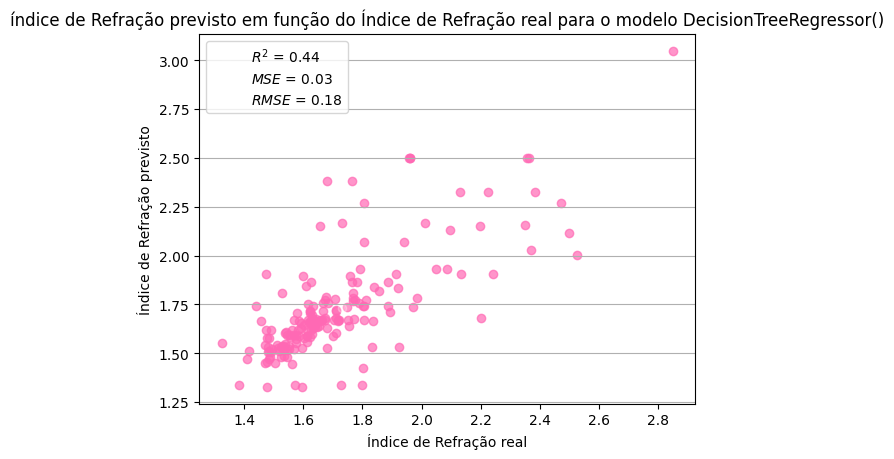

['0.44', '0.03', '0.18']

In [129]:
from sklearn.tree import DecisionTreeRegressor
arvore_decisao = DecisionTreeRegressor()
grafico_metricas_erro(X_vif_treino,y_vif_treino,X_vif_teste,y_vif_teste, arvore_decisao)


Para o VIF:


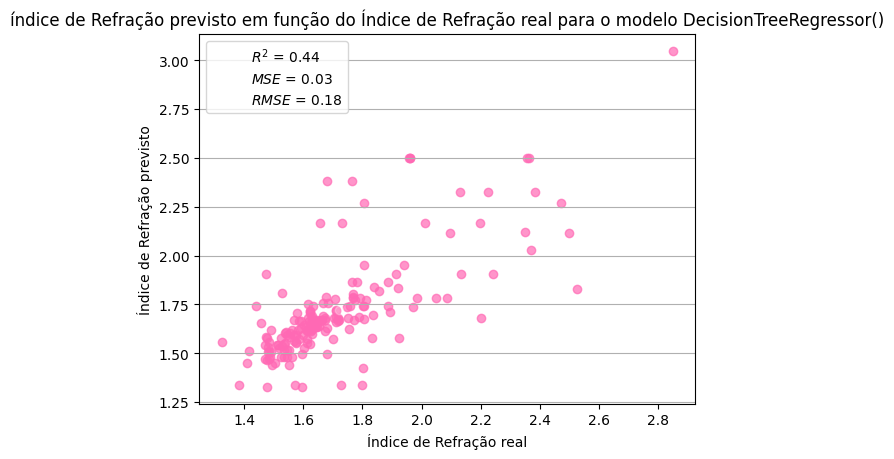

Para o Normal:


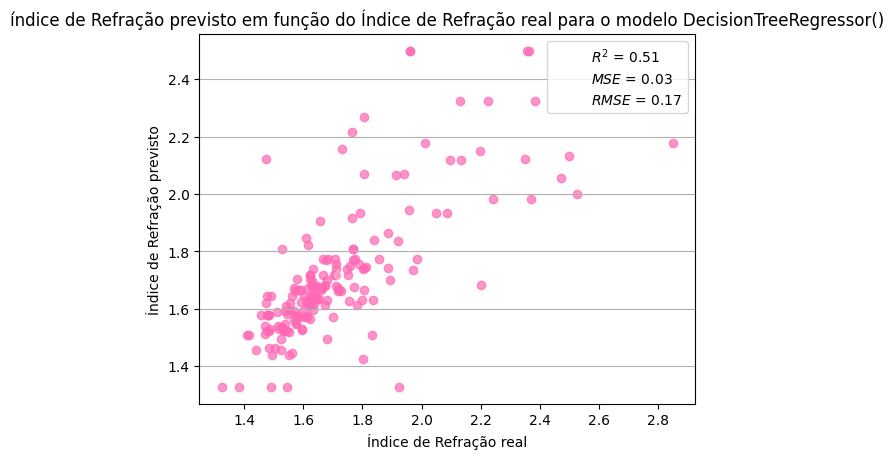

As estatísticas de erro do modelo vif tiveram pior desempenho que o modelo normal:

Estatísticas do normal:
['0.51', '0.03', '0.17']
----
Estatísticas do modelo vif:
['0.44', '0.03', '0.18']


In [100]:
teste(arvore_decisao)

## <p style = 'text-align:center;'> Modelo k-NN

O modelo de k-NN considera a proximidade dos dados de amostra no hiperplano com os dados de teste. A partir da distância entre eles, ele é capaz de predizer quanto um dado valeria.

c:\venv\ilumpy\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\venv\ilumpy\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


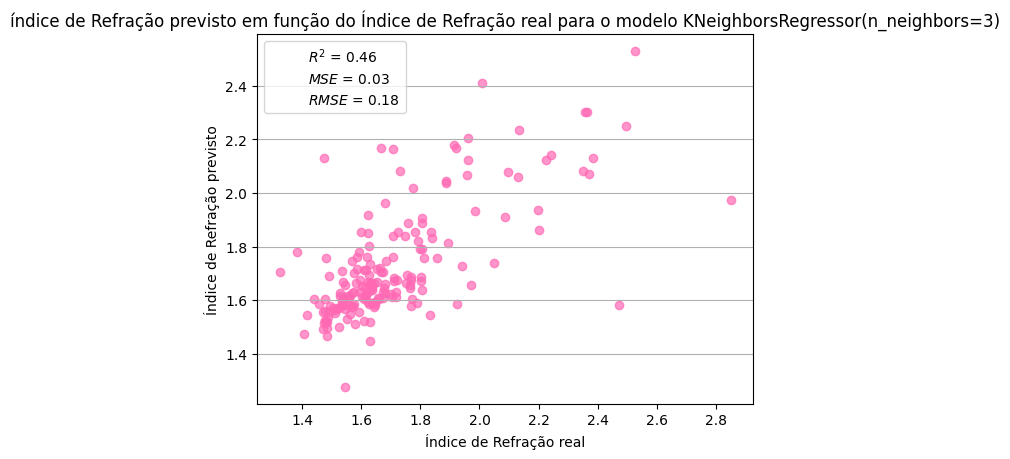

['0.46', '0.03', '0.18']

In [71]:
from sklearn.neighbors import KNeighborsRegressor
NUM_VIZINHOS = 3
modelo_knn = KNeighborsRegressor(n_neighbors=NUM_VIZINHOS)
grafico_metricas_erro(X_vif_treino,y_vif_treino,X_vif_teste,y_vif_teste, modelo_knn)

Para o VIF:


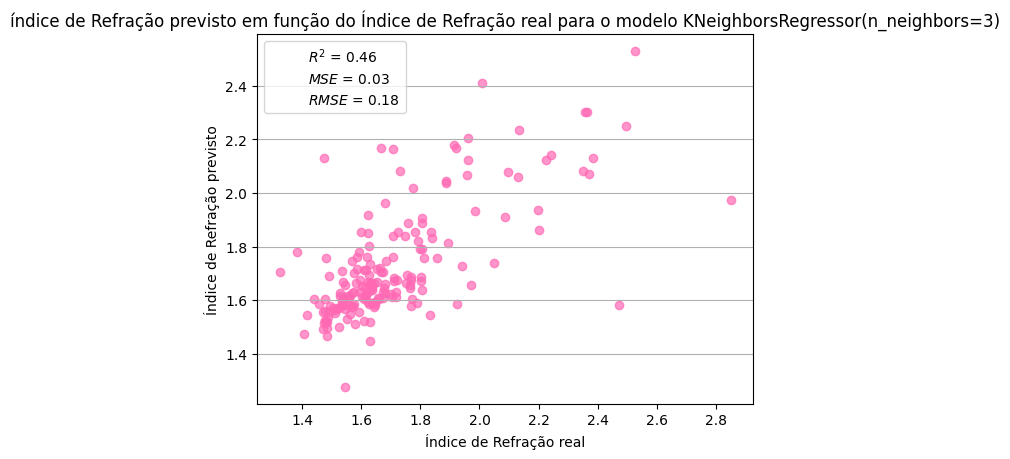

Para o Normal:


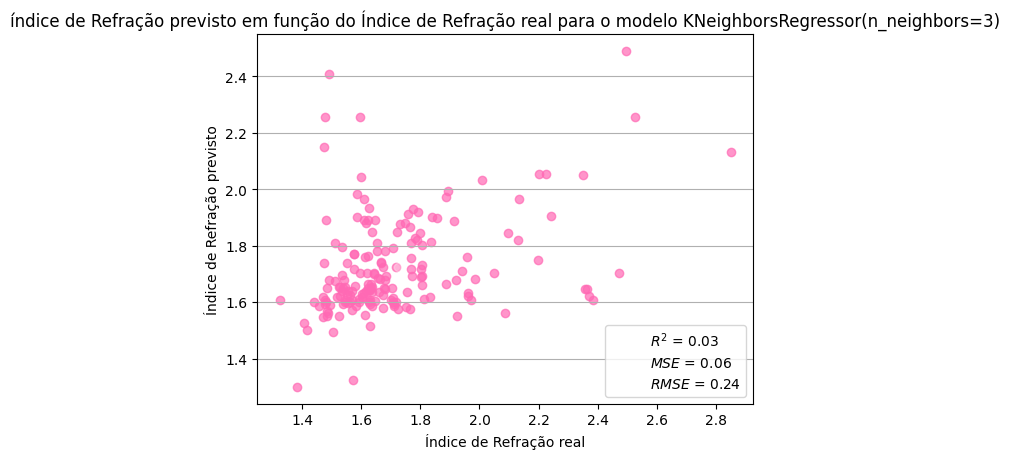

As estatísticas de erro do modelo normal tiveram pior desempenho que o modelo por VIF:

Estatísticas do VIF:
['0.46', '0.03', '0.18']
----
Estatísticas do modelo normal:
['0.03', '0.06', '0.24']


In [98]:
teste(modelo_knn)

## <p style='text-align:center;'> Regressão por Suporte Vetorial (SVR)

O SVR é uma das técnicas de Support Vector Machine (SVM) e busca encontrar um hiperplano capaz de aproximar os dados. Ele é especialmente útil para problemas em altas dimensões e considera a existência de vetores nos pontos mais distantes do plano, que afetam o seu posicionamento.

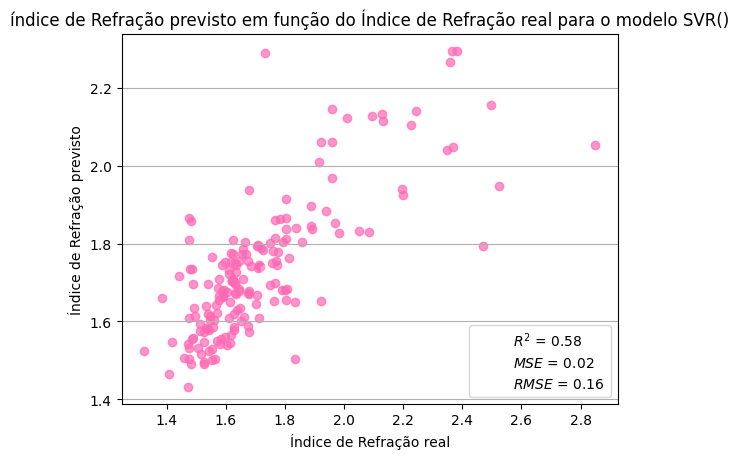

['0.58', '0.02', '0.16']

In [103]:
from sklearn.svm import SVR
SVR = SVR(kernel = 'rbf')
grafico_metricas_erro(X_vif_treino,y_vif_treino,X_vif_teste,y_vif_teste, SVR)

Para o VIF:


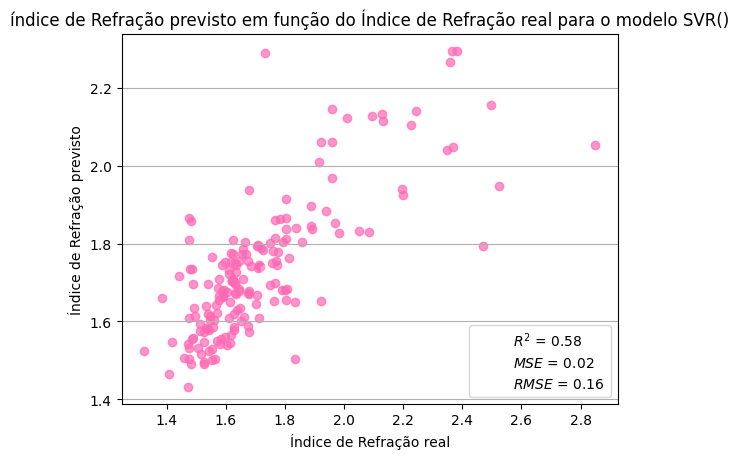

Para o Normal:


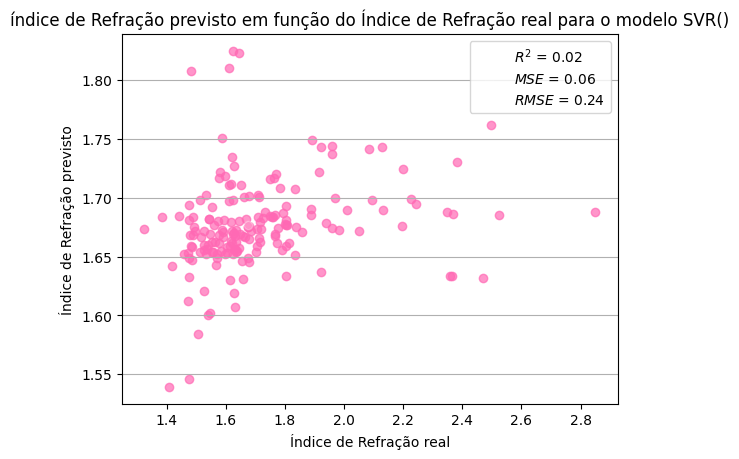

As estatísticas de erro do modelo normal tiveram pior desempenho que o modelo por VIF:

Estatísticas do VIF:
['0.58', '0.02', '0.16']
----
Estatísticas do modelo normal:
['0.02', '0.06', '0.24']


In [104]:
teste(SVR)

## <p style = 'text-align:center;'> Otimização de hiperparâmetros e validação cruzada

Alguns modelos, como a floresta aleatória e o SVR, contam com hiperparâmetros que, apesar de não alterar os dados em si, alteram o funcionamento do algoritmo em relação a esses dados. A validação cruzada busca testar diferentes hiperparâmetros para analisar qual obteve uma melhor performance. A biblioteca `scikit` permite fazer isso pela função `RandomizedSearchCV`.

### Para o SVR

Os hiperparâmetros do SVR são: valor de c, epsilon, kernel, gamma. Todos implicam penalidades durante o cálculo matemático.

In [124]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

#definindo X e y para o dataframe selecionado por VIF
Xvif = df_vif.reindex(ATRIBUTOSv, axis = 1)
yvif = df_vif.reindex(TARGETv,axis=1).values.ravel()
svrteste = SVR()

parametros = {
    'C': uniform(1, 10),            #intervalo de C
    'epsilon': [0.1, 0.2, 0.5],     #valores para epsilon
    'kernel': ['poly', 'rbf'],    # Limita aos kernel 'poly' e 'rbf'
    'gamma': ['scale']              # Define gamma fixo como 'scale'
}

busca_aleatoriA = RandomizedSearchCV(
    estimator=svrteste,
    param_distributions=parametros,
    n_iter=100,                      
    scoring='neg_mean_squared_error',
    cv=5,                         
    random_state=774,
    n_jobs=-1                      
)
busca_aleatoriA.fit(Xvif, yvif)
print("Melhores parâmetros:",busca_aleatoriA.best_params_)
print("Melhor MSE (negativo):", busca_aleatoriA.best_score_)


Melhores parâmetros: {'C': 2.399241219787254, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Melhor MSE (negativo): -0.02673090172964377


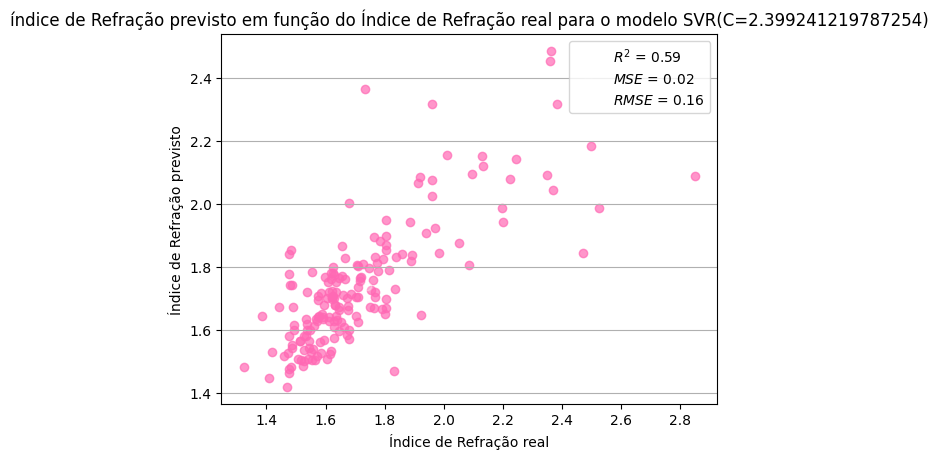

['0.59', '0.02', '0.16']

In [125]:
hiperparametros = busca_aleatoriA.best_params_
from sklearn.svm import SVR
svr = SVR(**hiperparametros)
grafico_metricas_erro(X_vif_treino,y_vif_treino,X_vif_teste,y_vif_teste, svr)


Para o VIF:


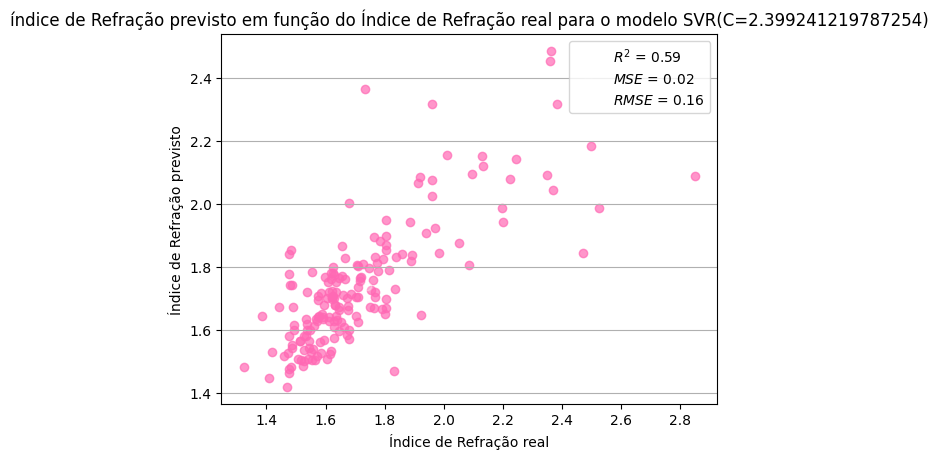

Para o Normal:


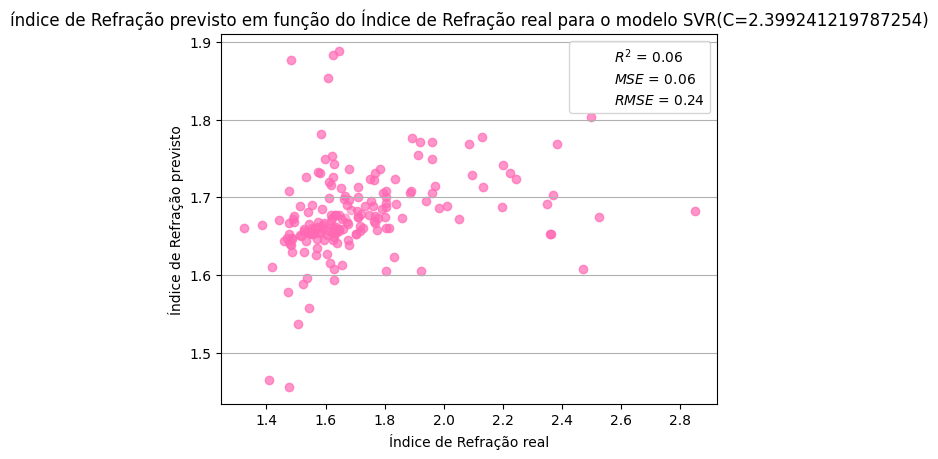

As estatísticas de erro do modelo normal tiveram pior desempenho que o modelo por VIF:

Estatísticas do VIF:
['0.59', '0.02', '0.16']
----
Estatísticas do modelo normal:
['0.06', '0.06', '0.24']


In [126]:
teste(svr)

## Para a floresta aleatória 

Os hiperparâmetros para a floresta aleatória são: número de árvores, profundidade máxima, fração mínima de amostrar por nó, número mpinimo de amostras em uma folha, substituição.

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

arvore = RandomForestRegressor(random_state=774)
parametros = {
    'n_estimators': randint(50, 300),         # Número de árvores na floresta
    'max_depth': randint(10, 50),             # Profundidade máxima da árvore
    'min_samples_split': uniform(0.1, 0.5),   # Mínimo de amostras por nó
    'min_samples_leaf': randint(1, 10),       # Mínimo de amostras por folha
    'max_features': ['auto', 'sqrt', 'log2'], # Seleção de número máximo de características
    'bootstrap': [True, False]                # Com ou sem substituição
}

busca_aleatoria = RandomizedSearchCV(
    estimator=arvore,
    param_distributions=parametros,
    n_iter=100,                    
    scoring='neg_mean_squared_error',
    cv=5,                          
    random_state=774,
    n_jobs=-1                    
)
busca_aleatoria.fit(Xvif, yvif)
print("Melhores parâmetros:", busca_aleatoria.best_params_)
print("Melhor MSE (negativo):", busca_aleatoria.best_score_)


c:\venv\ilumpy\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
175 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
113 fits failed with the following error:
Traceback (most recent call last):
  File "c:\venv\ilumpy\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\venv\ilumpy\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\venv\ilumpy\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\venv\ilumpy\Lib\site-packages\sklearn\utils\_param_validation.py", line 96, i

Melhores parâmetros: {'bootstrap': False, 'max_depth': 47, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 0.12381910068222471, 'n_estimators': 104}
Melhor MSE (negativo): -0.02832813782686453


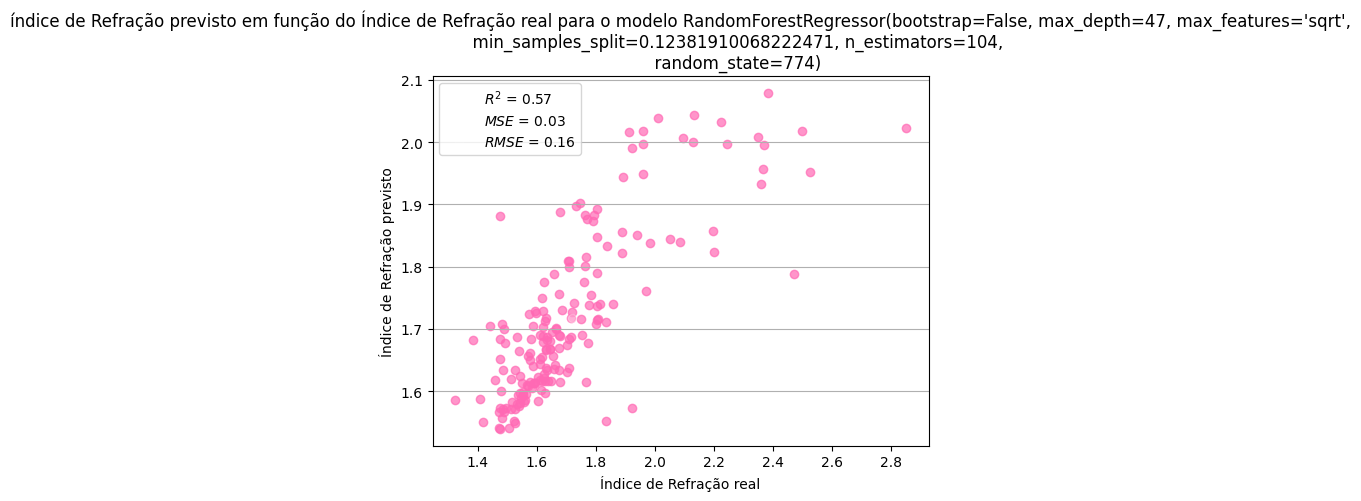

['0.57', '0.03', '0.16']

In [135]:
parametros_floresta = busca_aleatoria.best_params_
floresta_aleatoriA = RandomForestRegressor(**parametros_floresta, random_state=774)
grafico_metricas_erro(X_vif_treino,y_vif_treino,X_vif_teste,y_vif_teste, floresta_aleatoriA)


Para o VIF:


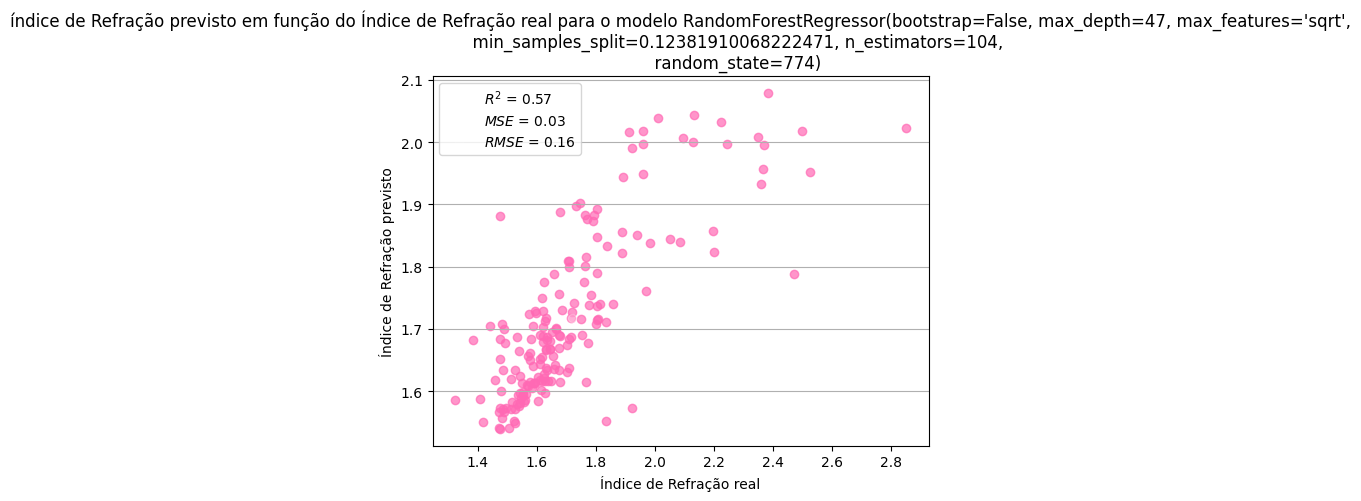

Para o Normal:


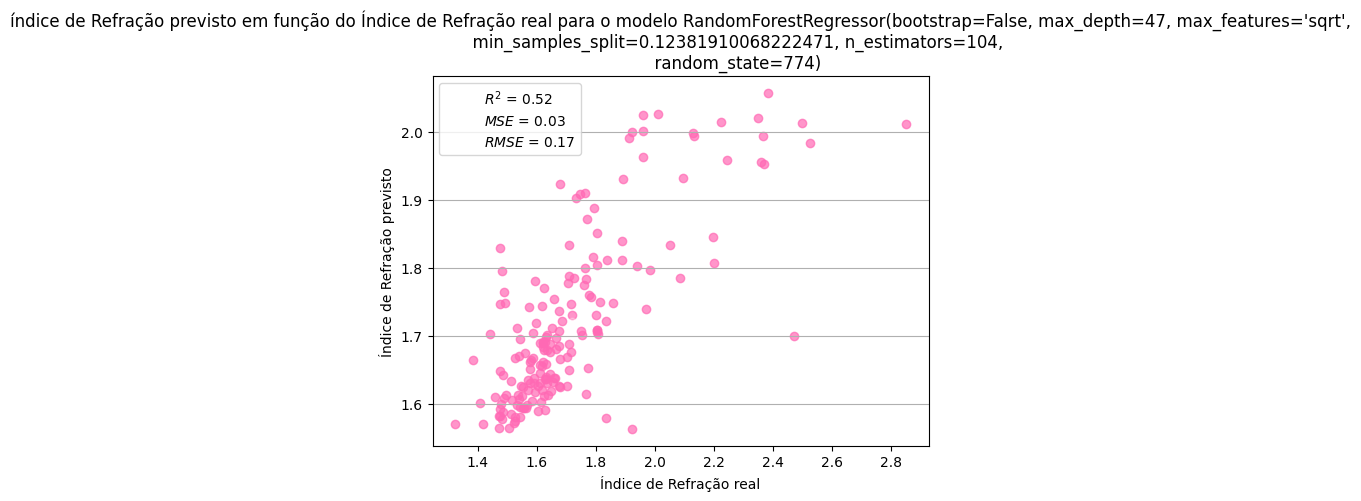

As estatísticas de erro do modelo normal tiveram pior desempenho que o modelo por VIF:

Estatísticas do VIF:
['0.57', '0.03', '0.16']
----
Estatísticas do modelo normal:
['0.52', '0.03', '0.17']


In [136]:
teste(floresta_aleatoriA)

# <p style = 'text-align:center;'> Resultados
De todos os modelos treinados, os que obtiveram melhor performance foram a floresta aleatória e o SVR. Isso pode ser explicado pela relativamente alta dimensionalidade do dataframe, e que por consequência se concilia melhor com modelos que navegam por grupos de características no hiperplano. As performances de cada modelo podem ser observadas abaixo:
    
| Modelo                          | R²   | MSE  | RMSE |
|---------------------------------|------|------|------|
| Baseline                        | 0.00 | 0.06 | 0.24 |
| Linear                          | 0.08 | 0.06 | 0.23 |
| Floresta Aleatória              | 0.64 | 0.02 | 0.15 |
| Árvore de Decisão               | 0.44 | 0.03 | 0.18 |
| k-NN                            | 0.46 | 0.03 | 0.18 |
| SVR                             | 0.58 | 0.02 | 0.16 |
| SVR - hiperparâmetro           | 0.59 | 0.02 | 0.16 |
| Floresta Aleatória - Hiperparâmetro | 0.57 | 0.03 | 0.16 |
    
Como é possível visualizar, as melhores performances em métricas de erro também implicam maior linearidade na relação entre o target real e o target previsto. Isso representa uma melhora significativa em relação ao modelo baseline, de cerca de 30% em relação ao RMSE. Ao analisar o desvio padrão, temos que o erro se encontra menor que ele (0.16<0.24). Isso é positivo, uma vez que indica que o modelo é capaz de prever os dados com um erro menor do que a variação dos dados dentro do dataframe. Por fim, a otimização de hiperparâmetros pareceu melhorar a linearidade do modelo SVR, mas não foi benéfica ao modelo de Floresta Aleatória.

# <p style = 'text-align:center;'> Discussões
Uma seleção de atributos baseada por outro critério poderia ter trazido resultados mais proveitosos para o algoritmo. Além disso, buscas mais custosas para melhoria de hiperparâmetros, como por exemplo utilizando o Optuna, seriam úteis para melhorar as métricas de erro. Apesar disso, os modelos conseguiram prever com certa precisão os índices de refração, o que é positivo. 

# <p style  = 'text-align:center;'>  Conclusão
Consideramos que o trabalho foi bem-sucedido em prever o índice de refração de alguns minerais a partir de informações físico-químicas deles, com um mínimo de erro no MSE de 0.16. 

# <p style = 'text-align:center;'> Referências

O dataframe pode ser extraído e é explicado no site:
    
[1] Dataset Origin: https://www.kaggle.com/datasets/vinven7/comprehensive-database-of-minerals?resource=download.